# MAP565 Project on time series
## Study of Copulas

A copula $C({X_1, X_2, \ldots, X_n})$ is a multivariate cumulative distribution function whose marginal probability distributions are uniform on the interval $[0, 1]$. In other words, for random variables $X_1, X_2, \ldots, X_n$, the copula function $C({X_1, X_2, \ldots, X_n})$ defines the dependence structure among them, independently of the marginal distributions.

A function $C : I^2 \rightarrow I$ is a bivariate copula if it satisfies the following properties:


- For every $y, w \in I$,
    $$
    C(y, 1) = y \quad \text{and} \quad C(1, w) = w; \quad C(y, 0) = C(0, w) = 0.
    $$
- For every $y_1, y_2, w_1, w_2 \in I$ such that $y_1 \leq y_2$ and $w_1 \leq w_2$,
    $$
    C(y_2, w_2) - C(y_2, w_1) - C(y_1, w_2) + C(y_1, w_1) \geq 0,
    $$

that is, the $C$-measure of the box vertices lying in $I^2$ is nonnegative. In particular, the last inequality implies that $C(y, w)$ is increasing in both variables.


Copulae are useful for capturing the dependence structure of random distributions with arbitrary marginals. This statement is clarified by Sklar’s theorem which is now cited for the bivariate case.

`Sklar’s theorem` : Let $F(x_1, x_2)$ be the joint cumulative distribution function of random variables $X_1$ and $X_2$ having continuous marginal distributions $F_1(x_1)$ and $F_2(x_2)$. Then, there exists a unique bivariate copula $C : I^2 \rightarrow I$ such that
$$
F(x_1, x_2) = C(F_1(x_1), F_2(x_2)) 
$$
where $C(\cdot, \cdot)$ is a joint distribution function with uniform marginals. Conversely, for any continuous distribution function $F_1(x_1)$ and $F_2(x_2)$ and any copula $C$, the function $F$ defined in equation $(1)$ is a joint distribution function with marginal distributions $F_1$ and $F_2$.

Sklar’s theorem provides a scheme for constructing copulae. Indeed, the function
$$
C(u_1, u_2) = F(F_1^{-1}(u_1), F_2^{-1}(u_2))
$$
is a bivariate copula, where the quasi-inverse $F_i^{-1}$ for $i = 1, 2$ is defined by
$$
F_i^{-1}(u) = \inf\{x|F_i(x) \geq u\} \quad \forall u \in (0, 1). 
$$

Much of the usefulness of the copulae follows from the fact that they are invariant with respect to strictly increasing transformations. More formally, let $X_1$ and $X_2$ be two continuous random variables with associated copula $C$. Now, letting $\alpha$ and $\beta$ be two strictly increasing functions and denoting by $C_{\alpha, \beta}$ the copula generated by $\alpha(X_1)$ and $\beta(X_2)$, it can be shown that for all $(u_1, u_2) \in I^2$,
$$
C_{\alpha, \beta}(u_1, u_2) = C(u_1, u_2). 
$$

Finally, let us denote by $c(\cdot, \cdot)$ the density function corresponding to the copula $C(\cdot, \cdot)$, that is,
$$
c(u_1, u_2) = \frac{\partial^2}{\partial u_1 \partial u_2} C(u_1, u_2).
$$
The following relationship between the joint density $f(\cdot, \cdot)$ and the copula density $c(\cdot, \cdot)$ can easily be obtained from equation $(1)$:
$$
f(x_1, x_2) = f_1(x_1)f_2(x_2)c(F_1(x_1), F_2(x_2))
$$
where $f_1(x_1)$ and $f_2(x_2)$ respectively denote the marginal density functions of $X_1$ and $X_2$. Thus, the copula density function can be expressed as follows:
$$
c(u_1, u_2) = \frac{f(F_1^{-1}(u_1), F_2^{-1}(u_2))}{f_1(F_1^{-1}(u_1)) f_2(F_2^{-1}(u_2))}.
$$



## Lower and upper tail dependance

Let $X_1$ and $X_2$ be random variables with copula $C \in \mathcal{C}^2$ and continuous and strictly
increasing distribution functions $F_1$ and $F_2$ , respectively. Then the lower tail dependence
coefficient is given by:

$$\lambda_{l}=\operatorname*{lim}_{\alpha\rightarrow0}\frac{C(\alpha,\alpha)}{\alpha},\quad\alpha\in(0,1)$$

Let $X_1$ and $X_2$ be random variables with copula $C \in \mathcal{C}^2$ and continuous and strictly
increasing distribution functions $F_1$ and $F_2$ , respectively. Then the upper tail dependence
coefficient is given by:

$$\lambda_{u}=2-\operatorname*{lim}_{\alpha\rightarrow1}{\frac{1-C(\alpha,\alpha)}{1-\alpha}},\quad\alpha\in(0,1)$$



In [101]:
import pandas as pd
import utils.functions as f
from datetime import datetime
from copulas.multivariate import GaussianMultivariate
import matplotlib.pyplot as plt

START_DATE = datetime(2021, 1, 1) 
END_DATE = datetime(2023, 4, 1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
All data downloaded : True


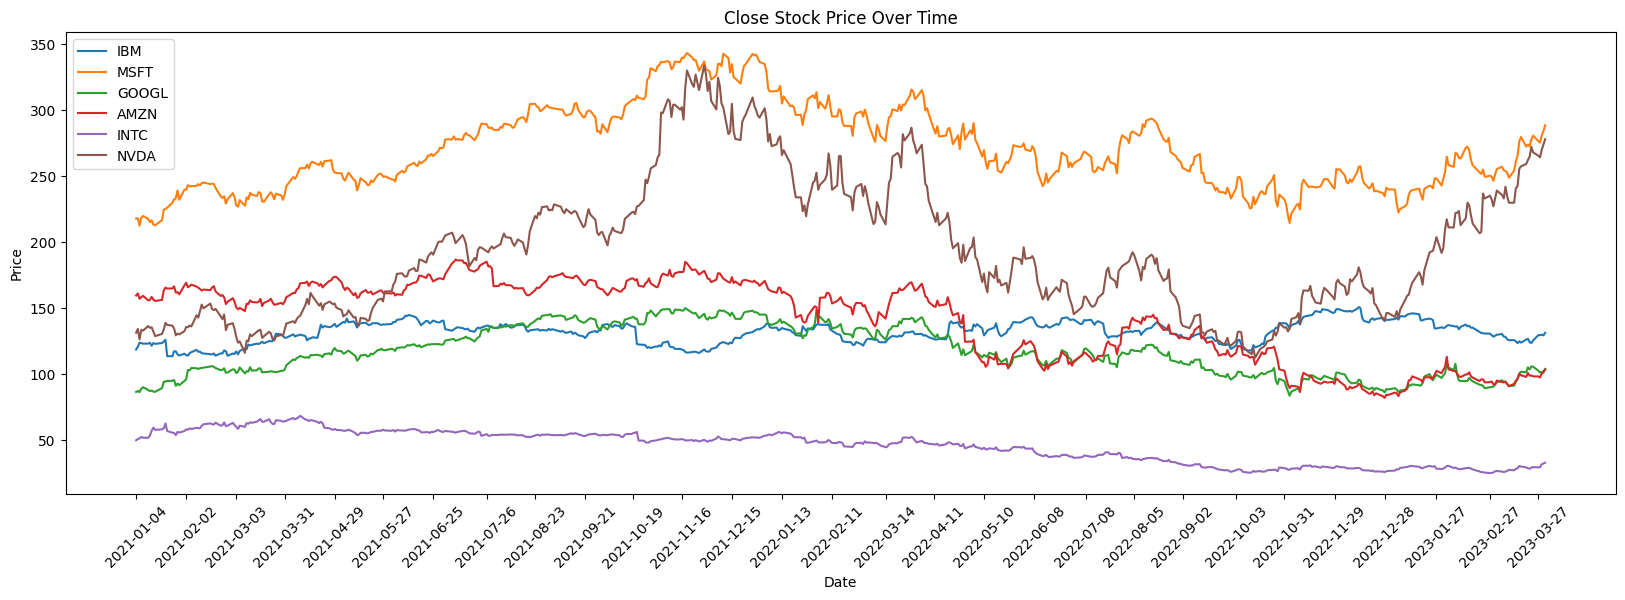

In [102]:
leaders_quantum_computing = ['IBM', 'MSFT', 'GOOGL', 'AMZN', 'INTC', 'TSLA', 'AAPL', 'NVDA', 'QCOM', 'AMD', 'QBTS', 'IONQ', 'HON', 'FORM']
leaders_quantum_computing = ['IBM', 'MSFT', 'GOOGL', 'AMZN', 'INTC', 'NVDA']
dict_stock_data = {}
for stock in leaders_quantum_computing : 
    dict_stock_data[stock] = f.get_stock_data(stock, START_DATE, END_DATE)

print(f"All data downloaded : {dict_stock_data.__len__() == len(leaders_quantum_computing)}")
f.plot_multiple_stock_data(dict_stock_data)

In [103]:
# Concaténer les données dans un DataFrame unique
list_df = []
for key in dict_stock_data.keys():
    list_df.append(dict_stock_data[key]["close"])  
data = pd.concat(list_df, axis=1)
data.columns = dict_stock_data.keys()
data['date'] = dict_stock_data[leaders_quantum_computing[0]]['date']

# Supprimer les lignes contenant des valeurs manquantes
data = data.dropna()
data.head()


,IBM,MSFT,GOOGL,AMZN,INTC,NVDA,date
0,118.489487,217.690002,86.306503,159.331497,49.669998,131.134995,2021-01-04
1,120.592735,217.899994,87.002502,160.925507,50.610001,134.047501,2021-01-05
2,123.604210,212.250000,86.143997,156.919006,51.099998,126.144997,2021-01-06
3,123.317398,218.289993,88.717003,158.108002,52.189999,133.440002,2021-01-07
4,122.877632,219.619995,89.891502,159.134995,51.650002,132.767502,2021-01-08


## Multivariate copula : Gaussian Copula

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encounte

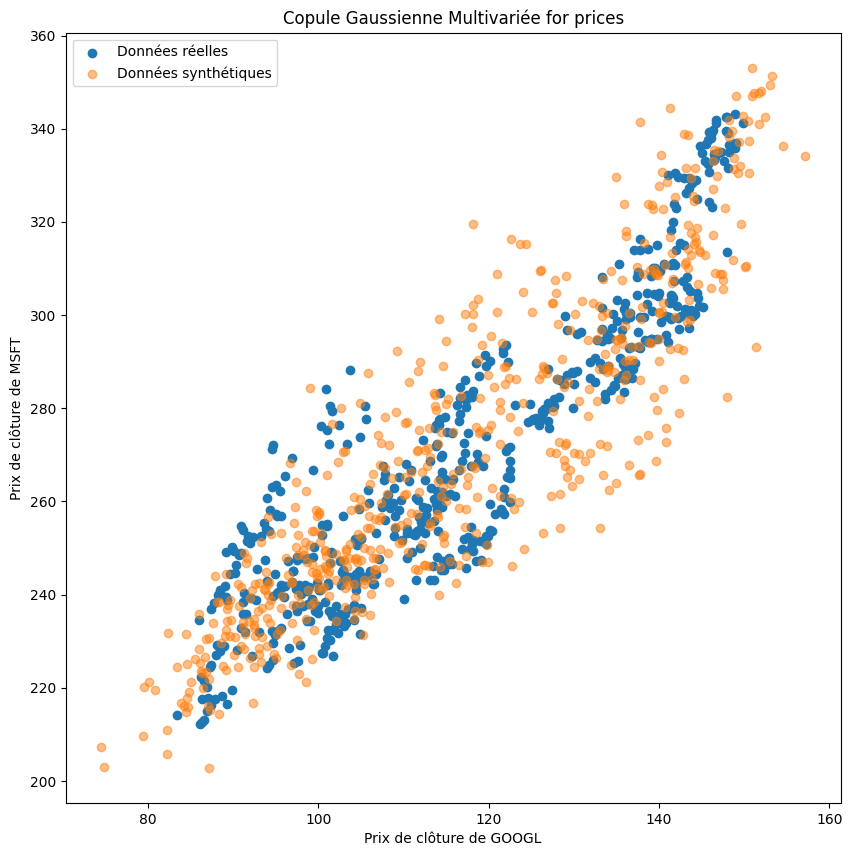

In [104]:
# Créer un modèle de copule gaussienne multivariée
copula = GaussianMultivariate()

# Ajuster le modèle de copule aux données
copula.fit(data[leaders_quantum_computing])

# Générer des échantillons synthétiques à partir du modèle
samples = copula.sample(len(data))

# Visualiser les données réelles et synthétiques pour une paire d'actifs
asset1 = 'GOOGL'
asset2 = 'MSFT'

plt.figure(figsize=(10, 10))
plt.scatter(data[asset1], data[asset2], label='Données réelles')
plt.scatter(samples[asset1], samples[asset2], label='Données synthétiques', alpha=0.5)
plt.xlabel(f'Prix de clôture de {asset1}')
plt.ylabel(f'Prix de clôture de {asset2}')
plt.legend()
plt.title('Copule Gaussienne Multivariée for prices')
plt.show()

In [105]:
from scipy import stats
# normality test
stats.normaltest(data[leaders_quantum_computing])


NormaltestResult(statistic=array([ 14.76411   ,  36.07137411, 504.41220401, 643.55666347,
       590.38367457,  39.53715087]), pvalue=array([6.22320703e-004, 1.46960504e-008, 2.93955504e-110, 1.79244621e-140,
       6.30687123e-129, 2.59786616e-009]))

On remarque que les p-values sont très faibles ce qui signifie que la copule gaussienne n'est pas pour autant très adapté à notre modèle, qui de plut fait intervenir des processus, il s'agirait donc de prendre en compte cette caractéristique de dépendance en t ainsi que la caractéristique d'information au temps t qui détermine la distribution suivante (normale dans le cas d'un mouvement brownien)

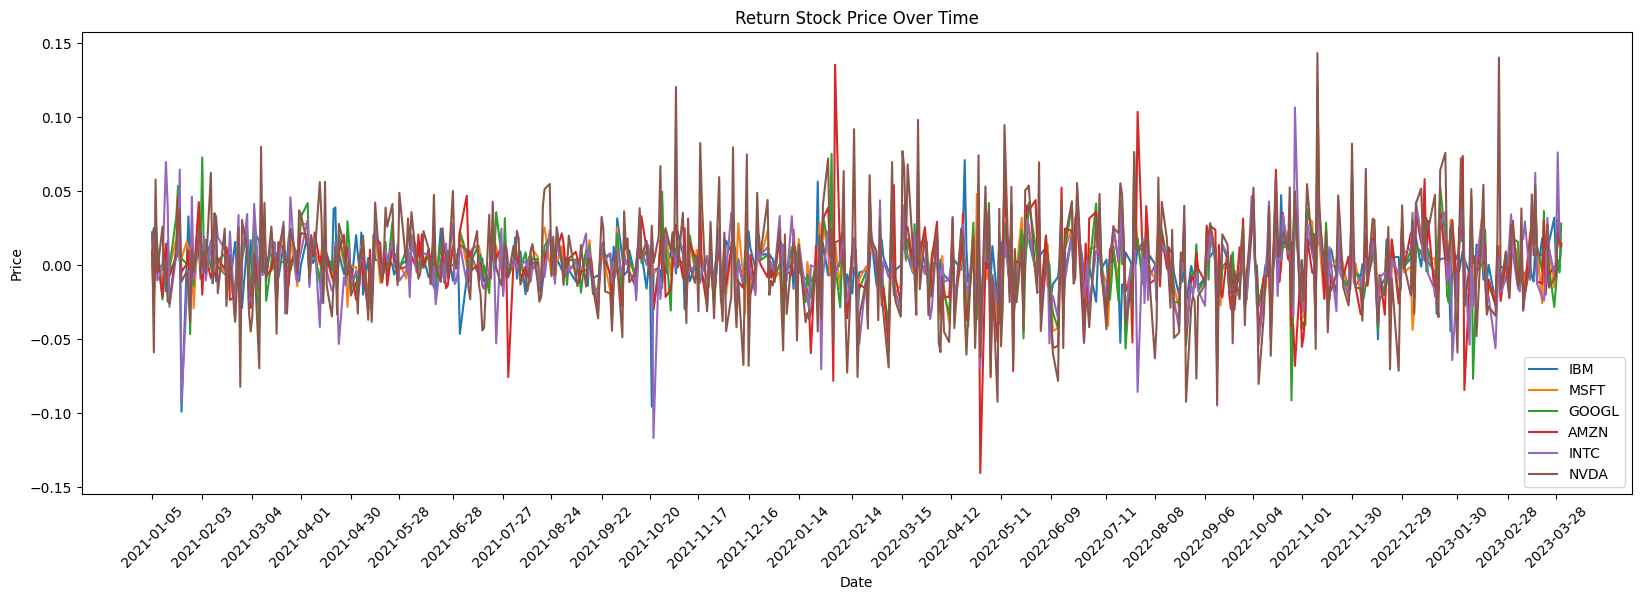

In [106]:
# 1. Compute the returns of the stocks
dict_stock_returns = {}
for stock in leaders_quantum_computing:
    dict_stock_returns[stock] = f.compute_stock_returns(dict_stock_data[stock])

# 2. Plot the returns of the stocks
f.plot_multiple_stock_data(dict_stock_returns, column='return')

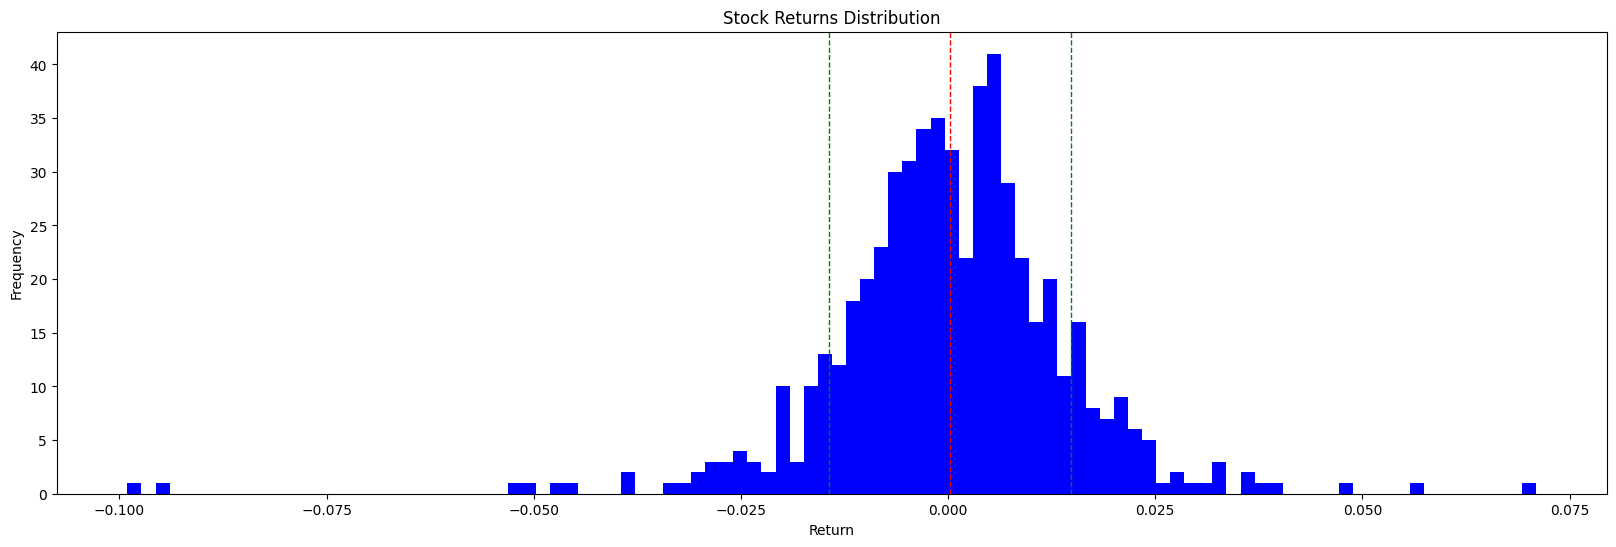

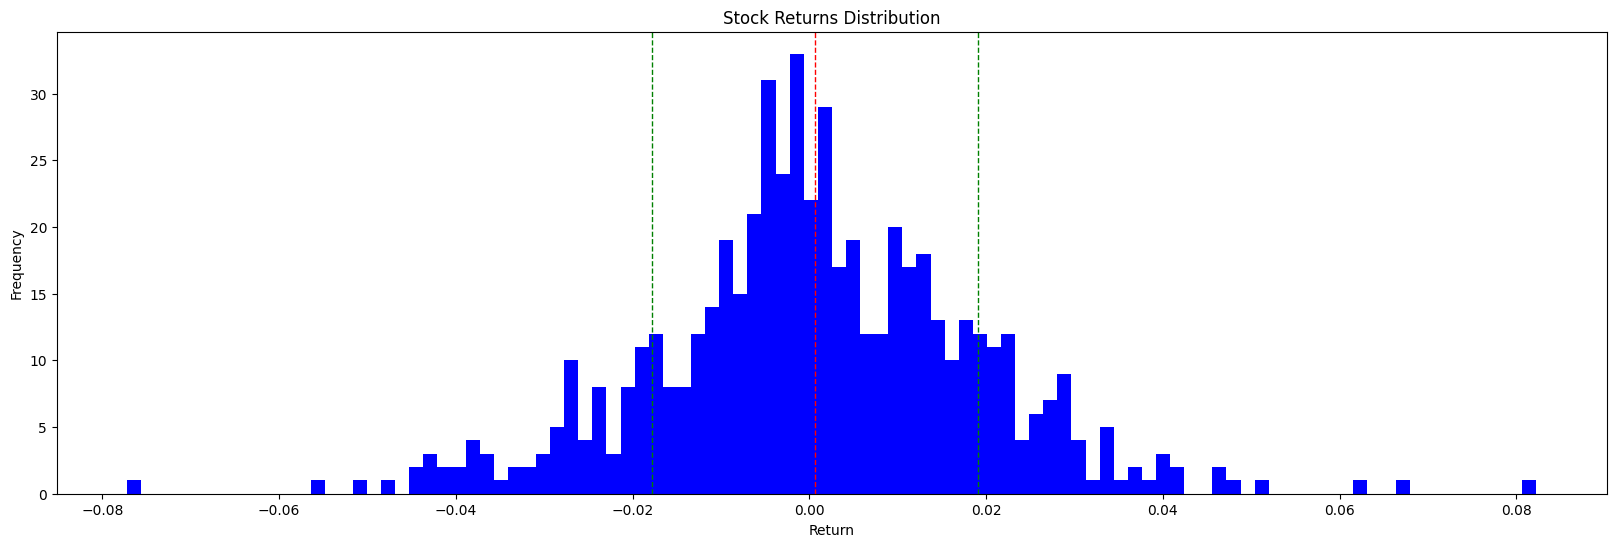

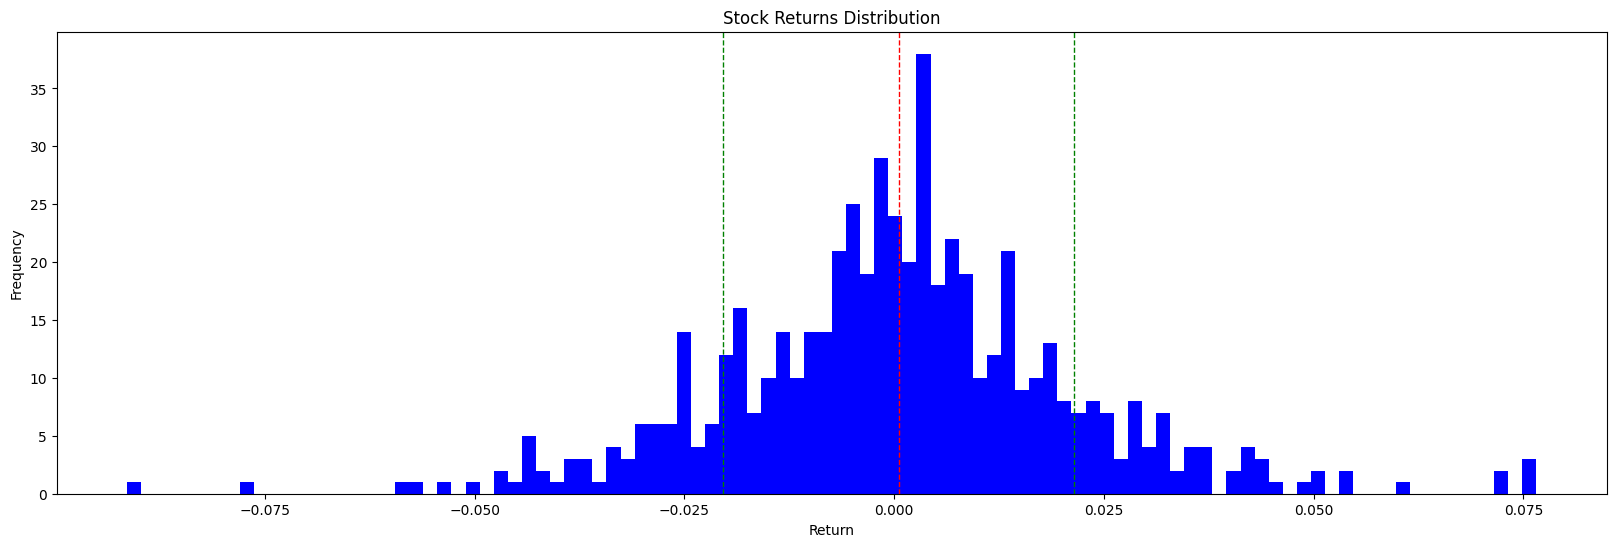

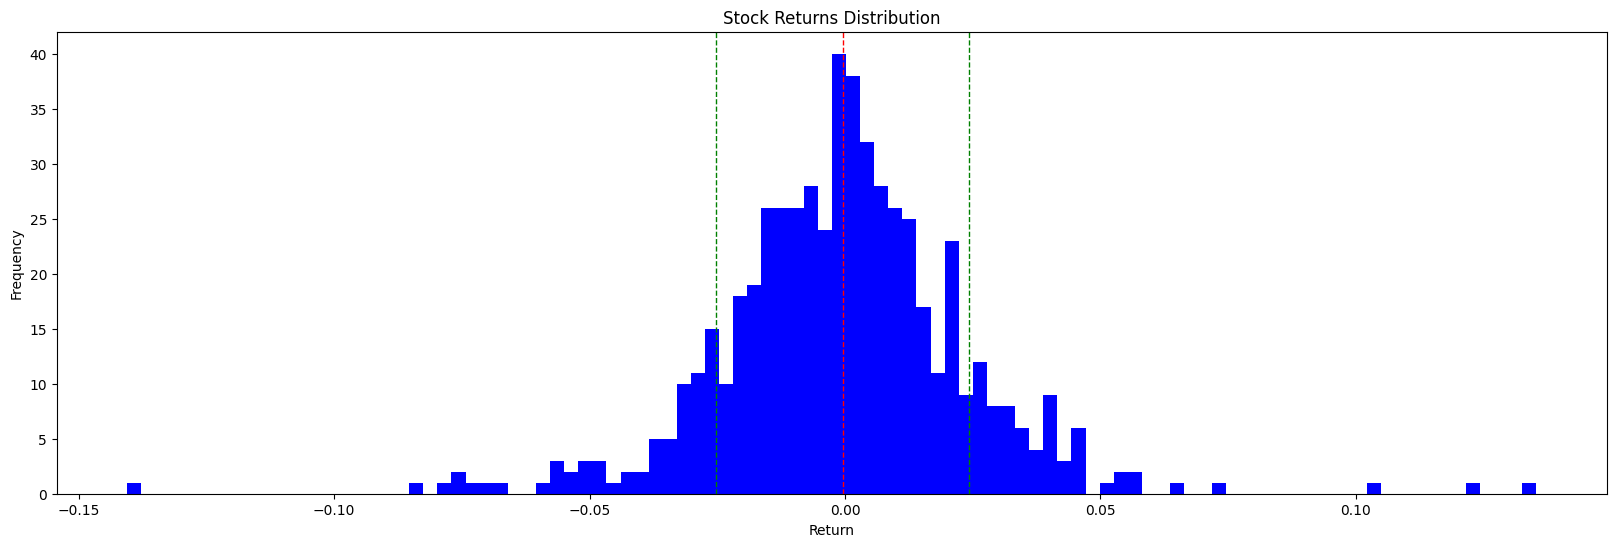

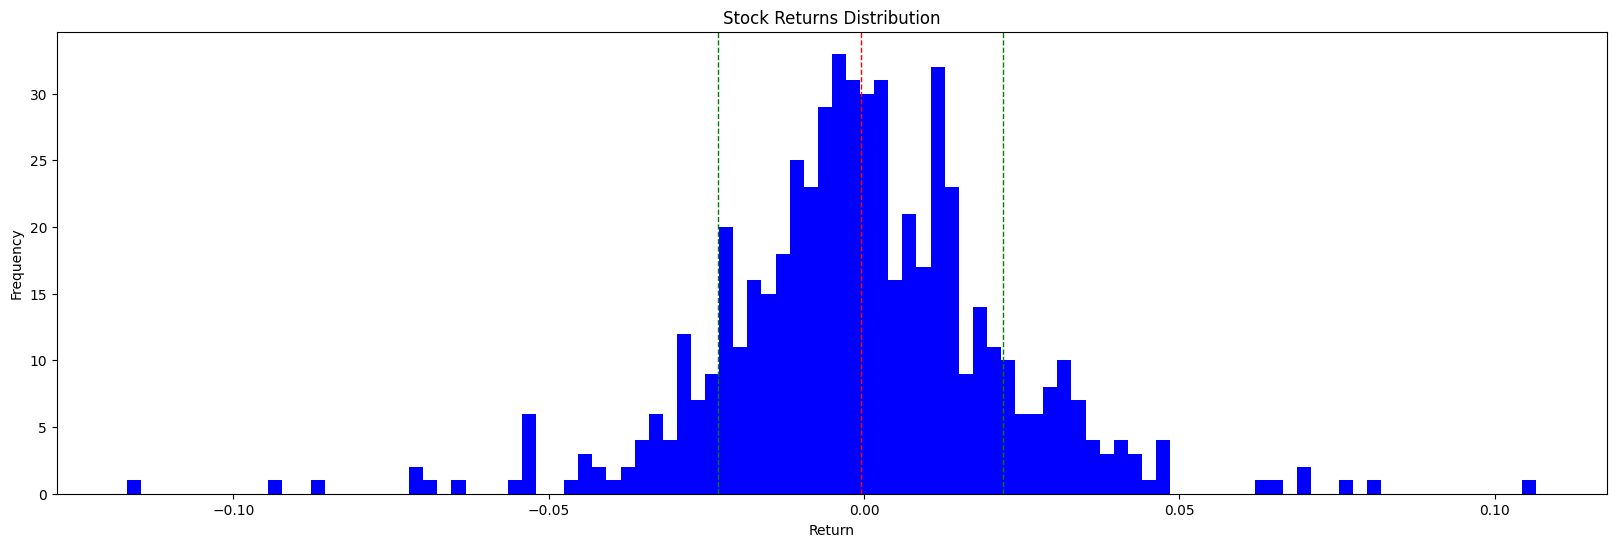

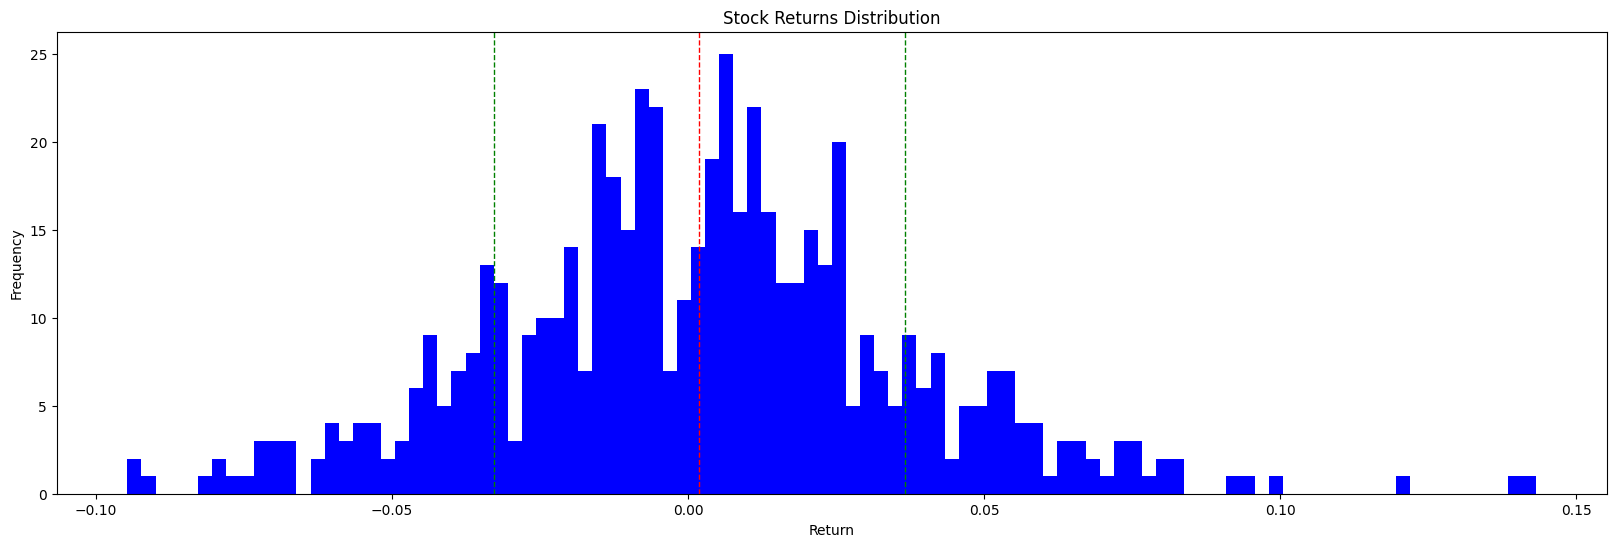

In [107]:
# plot distribution of returns
for stock in leaders_quantum_computing:
    f.plot_stock_returns_distribution(dict_stock_returns[stock])

In [108]:
## copulas on returns
# 1. Concatenate the returns in a single DataFrame
list_df = []
for key in dict_stock_returns.keys():
    list_df.append(dict_stock_returns[key]["return"])
returns = pd.concat(list_df, axis=1).dropna()
returns.columns = dict_stock_returns.keys()
returns.head()

,IBM,MSFT,GOOGL,AMZN,INTC,NVDA
1,0.017751,0.000965,0.008064,0.010004,0.018925,0.022210
2,0.024972,-0.025929,-0.009868,-0.024897,0.009682,-0.058953
3,-0.002320,0.028457,0.029869,0.007577,0.021331,0.057830
4,-0.003566,0.006093,0.013239,0.006496,-0.010347,-0.005040
5,0.000389,-0.009699,-0.023106,-0.021519,-0.002130,0.025966


In [109]:
from scipy import stats
# normality test
stats.normaltest(returns)

NormaltestResult(statistic=array([157.90462286,  18.95963743,  27.10685722,  68.51681865,
        50.5220924 ,  15.92240237]), pvalue=array([5.14572785e-35, 7.63777820e-05, 1.29963304e-06, 1.32361558e-15,
       1.06971240e-11, 3.48733972e-04]))

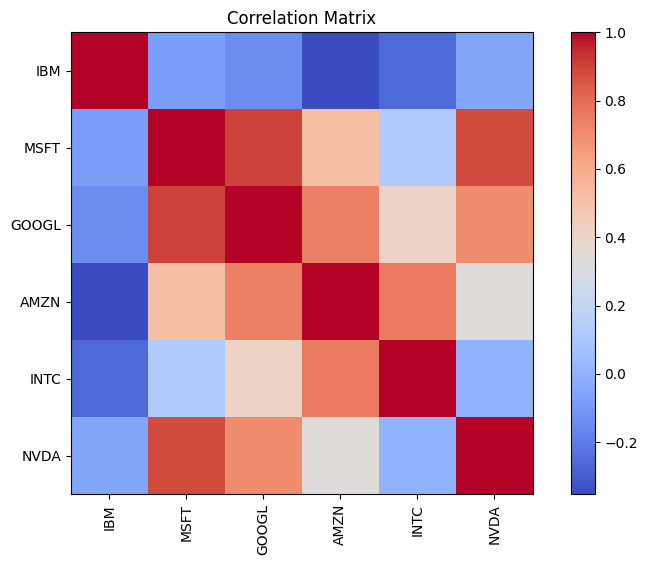

In [110]:
# get rho the coefficient of correlation
rho = copula.correlation
# plot the correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(rho, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(leaders_quantum_computing)), leaders_quantum_computing, rotation=90)
plt.yticks(range(len(leaders_quantum_computing)), leaders_quantum_computing)
plt.title('Correlation Matrix')
plt.show()


Kendall’s rank correlation coefficient (for bivariate case), $\rho_\tau = \frac{2}{\pi} arcsin(\rho)$, Where $\rho$ is the correlation coefficient between the two variables

The Spearman rank correlation coefficient is given by: $\rho_s = \frac{6}{\pi} arcsin(\frac{\rho}{2})$

In [111]:
# kendall tau between the asset1 and asset2
asset1 = 'GOOGL'
asset2 = 'MSFT'
tau, _ = stats.kendalltau(returns[asset1], returns[asset2])
print(f"Kendall's tau between {asset1} and {asset2} : {tau}")

# spearman rho between the asset1 and asset2
rho, _ = stats.spearmanr(returns[asset1], returns[asset2])
print(f"Spearman's rho between {asset1} and {asset2} : {rho}")

# upper tail dependence is 0 and lower tail dependence is 0

Kendall's tau between GOOGL and MSFT : 0.6234836173991912
Spearman's rho between GOOGL and MSFT : 0.8037965374321134


### Gaussian Copula on returns 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.11/lib/pyt

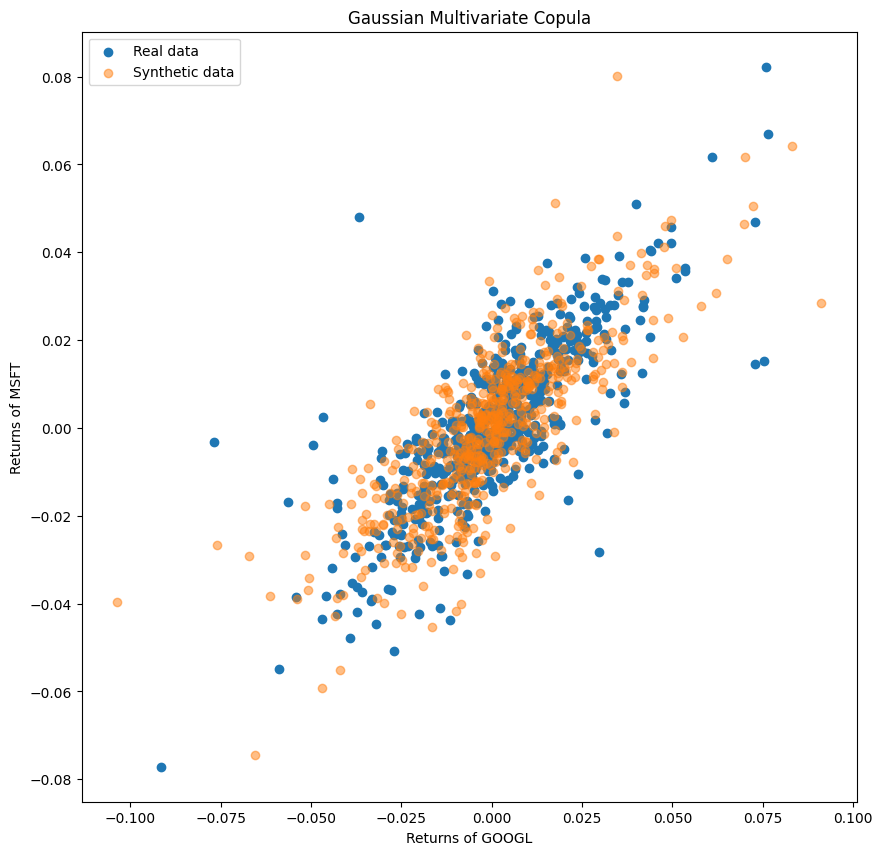

In [112]:
# copulas on returns
copula = GaussianMultivariate()
copula.fit(returns)

# Generate synthetic samples from the model
samples = copula.sample(len(returns))

# Visualize the real and synthetic data for a pair of assets
asset1 = 'GOOGL'
asset2 = 'MSFT'

plt.figure(figsize=(10, 10))
plt.scatter(returns[asset1], returns[asset2], label='Real data')
plt.scatter(samples[asset1], samples[asset2], label='Synthetic data', alpha=0.5)
plt.xlabel(f'Returns of {asset1}')
plt.ylabel(f'Returns of {asset2}')
plt.legend()
plt.title('Gaussian Multivariate Copula')
plt.show()

### Upper tail dependance

`proof for upper and lower tail dependance`: 
Consider a bivariate Gaussian copula $C(⋅)$.

Because of the radial symmetry of a Gaussian copula we can consider just the lower tail dependence. We know that the lower tail dependence for this copula is:
$$\begin{array}{l}{\lambda=\operatorname*{lim}_{q\rightarrow0^{+}}\frac{\partial C(q,q)}{\partial q}}\\ {=\operatorname*{lim}_{q\rightarrow0^{+}}\operatorname*{Pr}(U_{2}\le q\mid U_{1}=q)+\operatorname*{lim}_{q\rightarrow0^{+}}\operatorname*{Pr}(U_{1}\le q\mid U_{2}=q)}\end{array}$$
Since a Gaussian copula is exchangeable, it follows that:
$$\lambda=2\ \operatorname*{lim}_{q\rightarrow0^{+}}\operatorname*{Pr}(U_{2}\leq q\mid U_{1}=q)$$

Now, let:

$$(X_{1},X_{2}):=\left(\Phi^{-1}(U_{1}),\;\Phi^{-1}(U_{2})\right)$$

This means that $(X_{1},X_{2})$ has a bivariate normal distribution with standard marginals and correlation $\rho$. Now:

$$\begin{array}{l}{{\lambda=2~\operatorname*{lim}_{q\to0^{+}}\mathrm{Pr}(\Phi^{-1}(U_{2})\leq\Phi^{-1}(q)\mid\Phi^{-1}(U_{1})=\Phi^{-1}(q))}}\\ {{\,\,\,=2\operatorname*{lim}_{x\to-\infty}\mathrm{Pr}(X_{2}\leq x\mid X_{1}=x)}}\end{array}$$

Finally, we know that $X_{2}\mid X_{1}\sim N(\rho x,1-\rho^{2})$, so:
$$\lambda=2\operatorname*{lim}_{x\rightarrow-\infty}\Phi\!\left(x\sqrt{\frac{(1-\rho)}{(1+\rho)}}\right)=0$$

## Bivariate Copulas 

In [113]:
# Apply copula on the returns
asset1 = 'GOOGL'
asset2 = 'MSFT'

# Get the marginals
X = returns[asset1]
Y = returns[asset2]

# suppose data is normally distributed, normalize it, and apply cdf
mu1 = X.mean()
std1 = X.std()
mu2 = Y.mean()
std2 = Y.std()

# estimate Kendall tau parameter
kental_tau = stats.kendalltau(X, Y)


## Clayton Copula

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/clayton.py:56: RuntimeWarning: divide by zero encountered in power
  a = (self.theta + 1) * np.power(U * V, -(self.theta + 1))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/clayton.py:57: RuntimeWarning: divide by zero encountered in power
  b = np.power(U, -self.theta) + np.power(V, -self.theta) - 1
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/clayton.py:59: RuntimeWarning: invalid value encountered in multiply
  return a * np.power(b, c)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/tri/_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


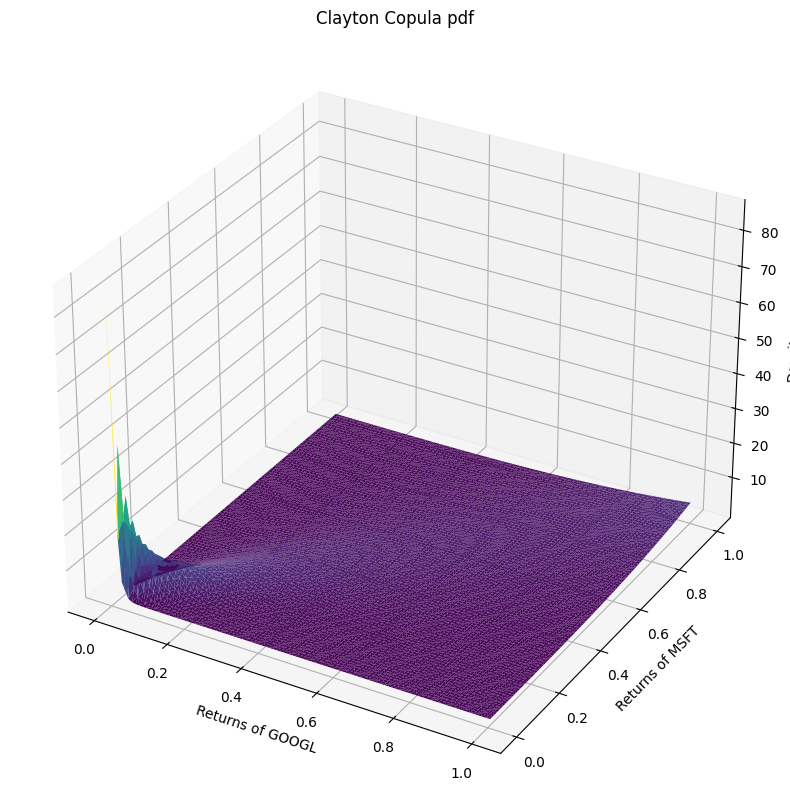

Kendall's tau : 0.6234836173991912
Theta = 3.311853859279333


In [114]:
import numpy as np
from scipy.stats import norm, expon
from copulas.univariate import GaussianKDE
from copulas.bivariate import Clayton

# estimate the copula parameters
theta = 2 * kental_tau.correlation / (1 - kental_tau.correlation)

dict_parameters = {'copula_type' : 'Clayton', 'theta': theta, 'tau': kental_tau.correlation}


# create copula with estimated parameters
copula = Clayton(dict_parameters)
copula.theta = theta
copula.tau = kental_tau.correlation

# 3D plot for density
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
Z = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
pdf = copula.pdf(Z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Z[:, 0], Z[:, 1], pdf, cmap='viridis')
ax.set_xlabel(f'Returns of {asset1}')
ax.set_ylabel(f'Returns of {asset2}')
ax.set_zlabel('Density')
plt.title('Clayton Copula pdf')
plt.show()

print(f"Kendall's tau : {kental_tau.correlation}")
print(f"Theta = {copula.theta}")


If $\theta = 0$ we obtain the independence copula. The Clayton copula (like the Frank copula) is a comprehensive copula in that it interpolates between a lower limit of the countermonotonicity copula ($\theta \rightarrow -1$)and an upper limit of the comonotonicity copula ($\theta \rightarrow + \infty$).

For Clayton copula : $\rho_\tau = \frac{\theta}{2+\theta}$, $\lambda_u = 0$ and $\lambda_d = 2^{-1/\theta}$

In [115]:
# upper tail dependance
lambda_u = 0
lambda_d = 2**(-1/copula.theta)
print(f"Upper tail dependence : {lambda_u}")
print(f"Lower tail dependence : {lambda_d}")

# kendall tau between the asset1 and asset2
tau, _ = stats.kendalltau(returns[asset1], returns[asset2])
caltulated_tau = copula.theta / (copula.theta + 2)
print(f"Kendall's tau between {asset1} and {asset2} : {tau}, calculated tau : {caltulated_tau}")


Upper tail dependence : 0
Lower tail dependence : 0.8111576906728644
Kendall's tau between GOOGL and MSFT : 0.6234836173991912, calculated tau : 0.6234836173991912


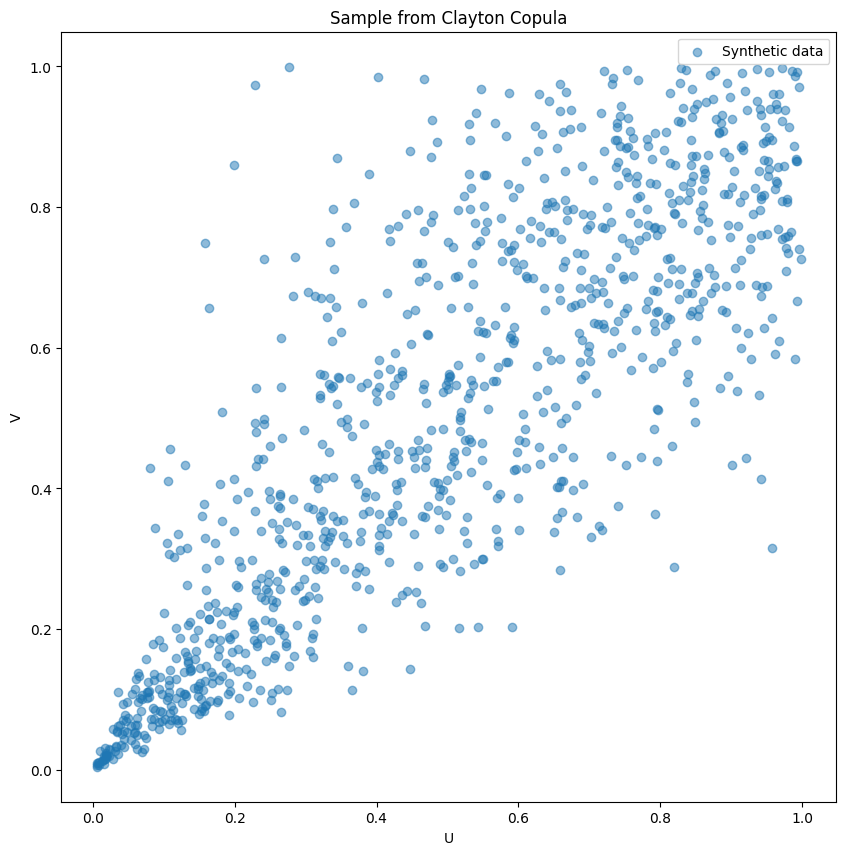

In [116]:
# sample from the copula
n_samples = 1000
samples = copula.sample(n_samples)
plt.figure(figsize=(10, 10))
plt.scatter(samples[:, 0], samples[:, 1], label='Synthetic data', alpha=0.5)
plt.xlabel('U')
plt.ylabel('V')
plt.legend()
plt.title('Sample from Clayton Copula')
plt.show()


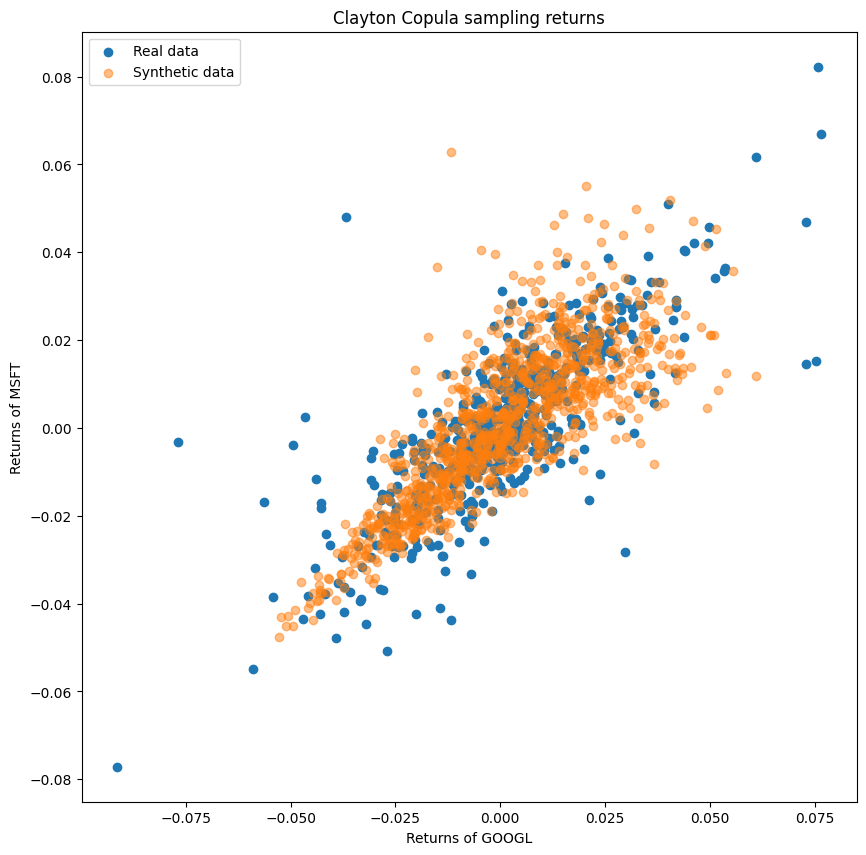

In [117]:
# then we apply ppf to the samples to get the returns
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, label='Real data')
X_sample = norm.ppf(samples[:, 0]) * std1 + mu1
Y_sample = norm.ppf(samples[:, 1]) * std2 + mu2
plt.scatter(X_sample, Y_sample, label='Synthetic data', alpha=0.5)
plt.xlabel(f'Returns of {asset1}')
plt.ylabel(f'Returns of {asset2}')
plt.legend()
plt.title('Clayton Copula sampling returns')
plt.show()

## Gumbel Copula

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:52: RuntimeWarning: divide by zero encountered in power
  a = np.power(U * V, -1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:53: RuntimeWarning: divide by zero encountered in log
  tmp = np.power(-np.log(U), self.theta) + np.power(-np.log(V), self.theta)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:54: RuntimeWarning: divide by zero encountered in power
  b = np.power(tmp, -2 + 2.0 / self.theta)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:55: RuntimeWarning: divide by zero encountered in log
  c = np.power(np.log(U) * np.log(V), self.theta - 1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:55: RuntimeWarning: invalid value encount

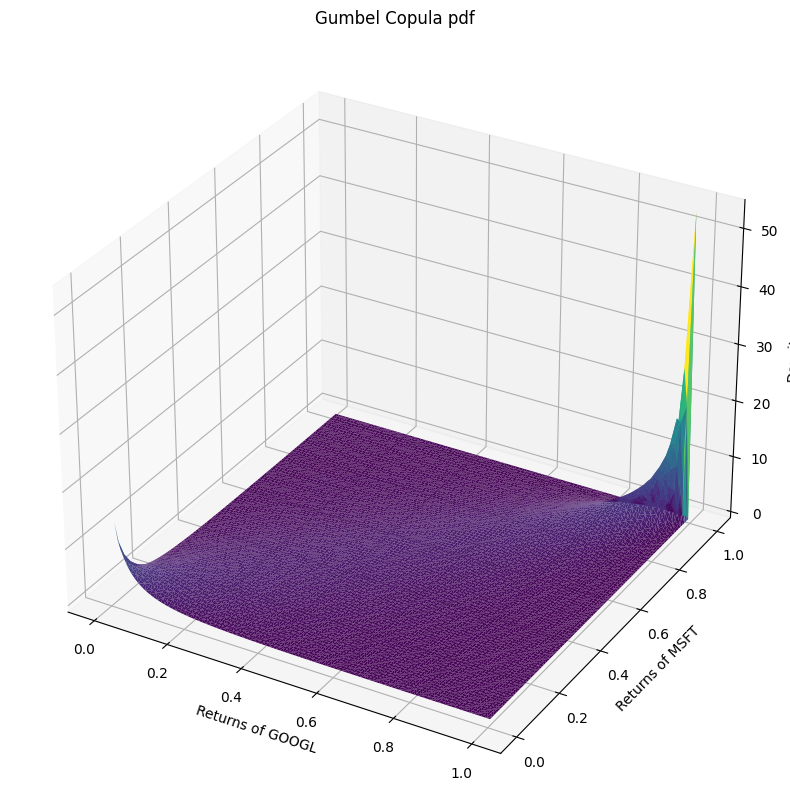

Kendall's tau : 0.6234836173991912
Theta = 2.6559269296396666


In [118]:
# same for gumbel copula
from copulas.bivariate import Gumbel

# estimate parameters for the copula
kental_tau = stats.kendalltau(X, Y)
theta = 1 / (1 - kental_tau.correlation)
dict_parameters = {'copula_type' : 'Gumbel', 'theta': theta, 'tau': kental_tau.correlation}

# create copula with estimated parameters
copula = Gumbel(dict_parameters)
copula.theta = theta
copula.tau = kental_tau.correlation

# 3D plot for density
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
Z = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
pdf = copula.pdf(Z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Z[:, 0], Z[:, 1], pdf, cmap='viridis')
ax.set_xlabel(f'Returns of {asset1}')
ax.set_ylabel(f'Returns of {asset2}')
ax.set_zlabel('Density')
plt.title('Gumbel Copula pdf')
plt.show()

print(f"Kendall's tau : {kental_tau.correlation}")
print(f"Theta = {copula.theta}")

If ($\theta = 1$) we obtain the independence copula and as ($\theta \rightarrow + \infty$) we approach the comonotonicity copula.
Here we have a relatively low theta which mean that we are close to the independant copula.


For Gumbel copula : $\rho_\tau = 1- \frac{1}{\theta}$, $\lambda_u = 2-2^{1/\theta}$ and $\lambda_d =0 $

In [119]:
# upper tail dependance

lambda_u = 2 - 2**(1/copula.theta)
lambda_d = 0
print(f"Upper tail dependence : {lambda_u}")
print(f"Lower tail dependence : {lambda_d}")

# kendall tau between the asset1 and asset2
tau, _ = stats.kendalltau(returns[asset1], returns[asset2])
caltulated_tau = 1-1/copula.theta
print(f"Kendall's tau between {asset1} and {asset2} : {tau}, calculated tau : {caltulated_tau}")

Upper tail dependence : 0.7017966513963383
Lower tail dependence : 0
Kendall's tau between GOOGL and MSFT : 0.6234836173991912, calculated tau : 0.6234836173991912


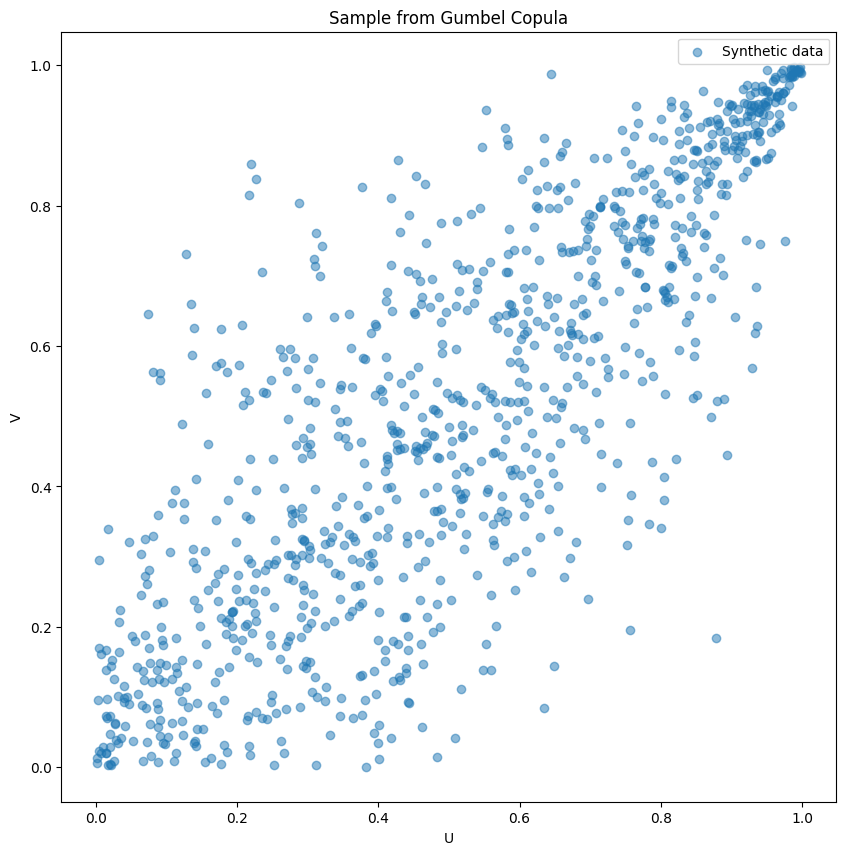

In [120]:
# sample from the copula
n_samples = 1000
samples = copula.sample(n_samples)
plt.figure(figsize=(10, 10))
plt.scatter(samples[:, 0], samples[:, 1], label='Synthetic data', alpha=0.5)
plt.xlabel('U')
plt.ylabel('V')
plt.legend()
plt.title('Sample from Gumbel Copula')
plt.show()

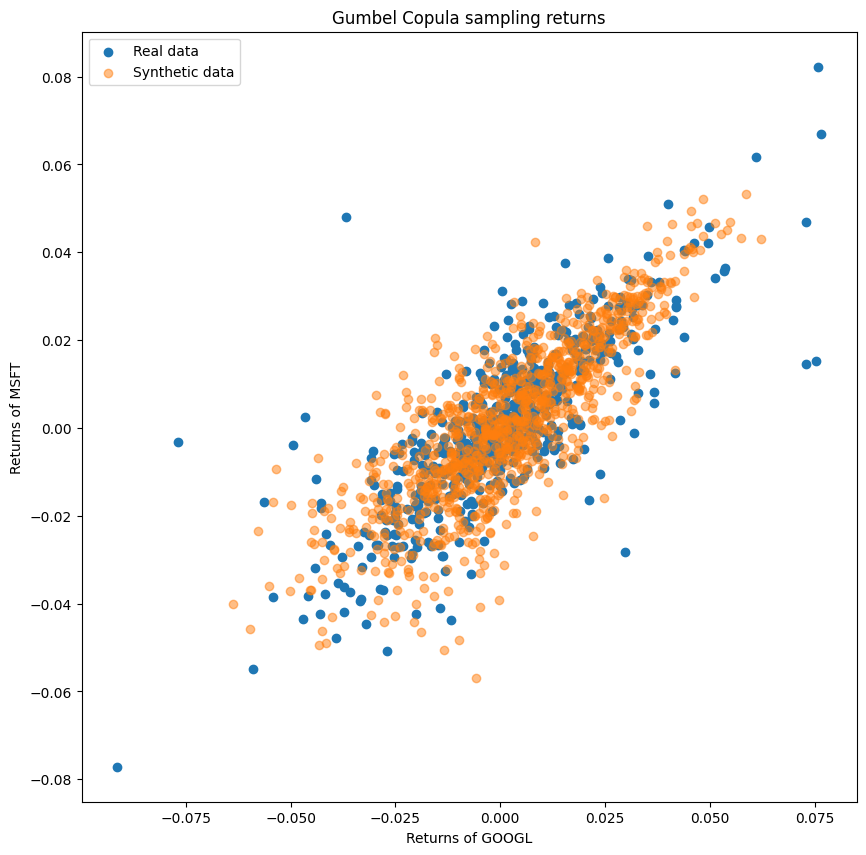

In [121]:
# then we apply ppf to the samples to get the returns
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, label='Real data')
X_sample = norm.ppf(samples[:, 0]) * std1 + mu1
Y_sample = norm.ppf(samples[:, 1]) * std2 + mu2
plt.scatter(X_sample, Y_sample, label='Synthetic data', alpha=0.5)
plt.xlabel(f'Returns of {asset1}')
plt.ylabel(f'Returns of {asset2}')
plt.legend()
plt.title('Gumbel Copula sampling returns')
plt.show()


## Copulas associated with Brownian motion processes and their maxima

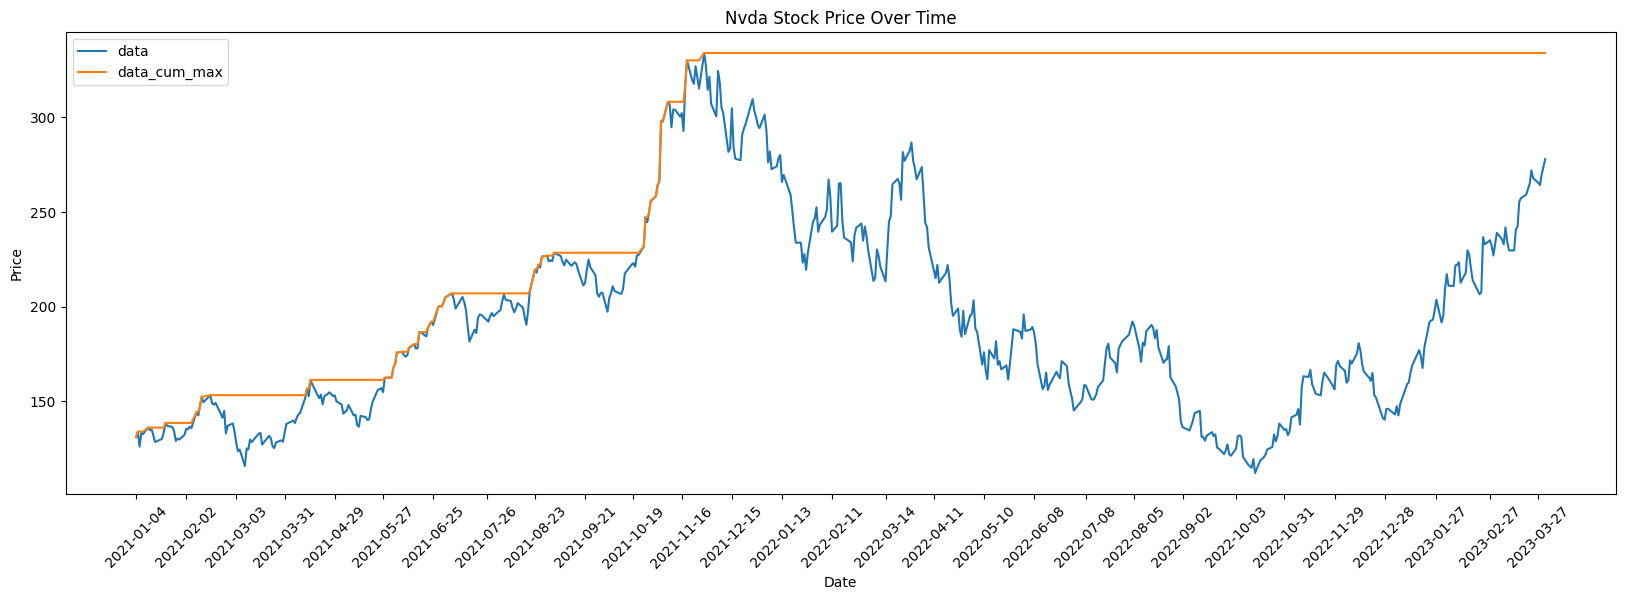

,NVDA_close,NVDA_close_cummax
0,131.134995,131.134995
1,134.047501,134.047501
2,126.144997,134.047501
3,133.440002,134.047501
4,132.767502,134.047501


In [122]:
# make the cummulative maximum for each column
STOCK = 'NVDA'
data_cum_max = data.cummax()
# plot the data
f.plot_multiple_stock_data({'data': data, 'data_cum_max': data_cum_max}, column = STOCK)

# copula between the data and the cummulative maximum

data_and_data_max = pd.concat([data[STOCK], data_cum_max[STOCK]], axis=1)
data_and_data_max.columns = [f'{STOCK}_close', f'{STOCK}_close_cummax']
data_and_data_max.head()

As previously defined, $\{W_t\}_{t \geq 0}$ shall denote a standard Brownian motion and $M_t = \max_{0 \leq s \leq t} W_s$, its maximum on the interval $[0, t]$. It is well known (see for instance, Etheridge (2002), Harrison (1990), Karlin and Taylor (1975), Revuz and Yor (2005), Rogers and Williams (2000)) that the joint distribution of $(W_t, M_t)$ and the marginal distribution of $M_t$ are respectively given by
$$
P\{M_t \leq a, W_t \leq x\} =
\begin{cases}
\Phi\left(\frac{x}{\sqrt{t}}\right) - \Phi\left(\frac{x - 2a}{\sqrt{t}}\right) & \text{if } x \leq a \\
2\Phi\left(\frac{a}{\sqrt{t}}\right) - 1 & \text{if } x > a, \quad \forall t \in \mathbb{R}^+
\end{cases}
$$

and

$$
P\{M_t \leq a\} = 2\Phi\left(\frac{a}{\sqrt{t}}\right) - 1, \quad \forall t \in \mathbb{R}^+,
$$

where $\Phi(\cdot)$ is the standard normal distribution function.

In this section, several bivariate copulae are constructed from the joint distribution functions specified in the previous section.

In light of the invariance properties of copulae, we consider a BM with $\sigma = 1$, since a $(\mu, \sigma)$-BM can be derived from a $\left(\mu, \frac{\sigma}{\sigma}, 1\right)$-BM via a simple transformation (rescaling).

As well, it follows from equations $(7)$ and $(8)$ that
$$
F_{M_t}(a) = P\{M_t \leq a\} = 2\Phi\left(\frac{a}{\sqrt{t}}\right) - 1,
$$
and
$$
F_{W_t,M_t}(x, a) = P\{W_t \leq x, M_t \leq a\} =
\begin{cases}
\Phi\left(\frac{x}{\sqrt{t}}\right) - \Phi\left(\frac{x - 2a}{\sqrt{t}}\right) & \text{if } x \leq a \\
2\Phi\left(\frac{a}{\sqrt{t}}\right) - 1 & \text{if } x > a.
\end{cases}
$$

Let
$$
F_{W_t}(x) = P\{W_t \leq x\} = \Phi\left(\frac{x}{\sqrt{t}}\right)
$$
be the marginal distribution of a standard BM.

It follows from equation $(2)$ that the copula $C_{W_t, M_t}(u, v)$ generated by a BM and its maximum is
$$
C_{W_t, M_t}(u, v) =
\begin{cases}
u - \Phi\left(\Phi^{-1}(u) - 2\Phi^{-1}\left(v + \frac{1}{2}\right)\right) & \text{if } u \leq v + \frac{1}{2} \\
v & \text{if } u > v + \frac{1}{2}, 
\end{cases}
$$
its associated density function $c_{W_t, M_t}(u, v)$ being
$$
c_{W_t, M_t}(u, v) = \frac{\partial^2}{\partial u \partial v} C_{W_t, M_t}(u, v) =
\begin{cases}
\frac{\left[ 2\Phi^{-1}\left( \frac{v+1}{2}\right) + \Phi^{-1}(u)\right] \phi\left(2\Phi^{-1}\left(\frac{v+1}{2}\right) - \Phi^{-1}(u)\right)} {\phi\left(\Phi^{-1}\left(\frac{v+1}{2}\right)\right) \phi\left(\Phi^{-1}(u)\right)} & \text{whenever } u \leq v + \frac{1}{2} \\
0 & \text{otherwise}, 
\end{cases}
$$
where $\phi(\cdot)$ denotes the standard normal density function.

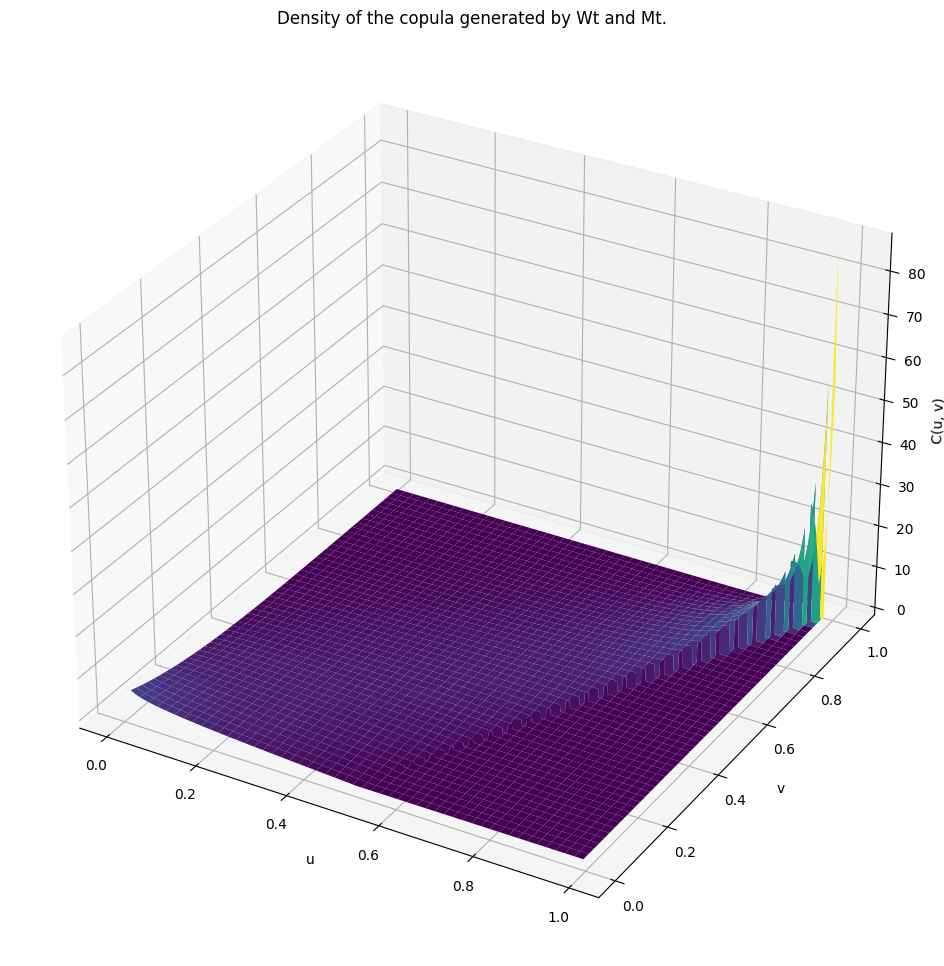

In [123]:
def copula(u,v):
    # for a brownian motion and its maximum
    # if u<(v+1)/2 ((2*phi-1((v+1)/2) - phi-1(u))*phi(phi-1((v+1)/2) - phi-1(u)))/(phi(phi-1((v+1)/2))*phi(phi-1(u)))
    # else = 0
    return np.where(u<(v+1)/2, ((2*stats.norm.ppf((v+1)/2) - stats.norm.ppf(u))*stats.norm.pdf(2*stats.norm.ppf((v+1)/2) - stats.norm.ppf(u)))/(stats.norm.pdf(stats.norm.ppf((v+1)/2))*stats.norm.pdf(stats.norm.ppf(u))), 0)

# plot 3d copula
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

u = np.linspace(0.01, 0.99, 1000)
v = np.linspace(0.01, 0.99, 1000)
U, V = np.meshgrid(u, v)
Z = copula(U, V)

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U, V, Z, cmap='viridis')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('C(u, v)')
ax.set_title('Density of the copula generated by Wt and Mt.')
plt.show()


    

Since the copulae involve variables that are not even interchangeable, they do not belong to the Archimedean class of copulae. Moreover, they clearly do not belong to the class of Gaussian copulae. They actually constitute a new type of copulae whose distributions conglomerate in the neighborhood of the point (1,1) and, to a lesser extent, near the origin, the corresponding copula density functions being equal to zero beyond a certain treshold that is specified by a relationship between the variables

Let
$$
F_{W_t,M_t}(x, y; \mu) = P\{W_{(\mu, 1)t} \leq x, M_{(\mu, 1)t} \leq y\} =
\begin{cases}
\Phi\left(\frac{x - \mu t}{\sqrt{t}}\right) - e^{2\mu y}\Phi\left(\frac{x - 2y - \mu t}{\sqrt{t}}\right) & \text{if } x \leq y \\
\Phi\left(\frac{y - \mu t}{\sqrt{t}}\right) - e^{2\mu y}\Phi\left(\frac{-y - \mu t}{\sqrt{t}}\right) & \text{if } x > y,
\end{cases}
$$
and
$$
F_{M_t}(y; \mu) = P\{M_{(\mu, 1)t} \leq y\} = \Phi\left(\frac{y - \mu t}{\sqrt{t}}\right) - e^{2\mu y}\Phi\left(\frac{-y - \mu t}{\sqrt{t}}\right),
$$
which are the distribution functions obtained in Proposition 2.1 and equation (9).

Let
$$
F_{W_t}(x; \mu) = P\{W_{(\mu, 1)t} \leq x\} = \Phi\left(\frac{x - \mu t}{\sqrt{t}}\right)
$$
be the distribution function of a $(\mu, 1)$-BM. For $y > 0$, the density function of $M_{(\mu, 1)t}$ is
$$
f_{M_t}(y; \mu) = \frac{1}{\sqrt{t}}\phi\left(\frac{y - \mu t}{\sqrt{t}}\right) - e^{2\mu y}\left[2\mu\Phi\left(\frac{-y - \mu t}{\sqrt{t}}\right) - \frac{1}{\sqrt{t}}\phi\left(\frac{-y - \mu t}{\sqrt{t}}\right)\right].
$$
Therefore, the copula $C_{W_t, M_t}(u, v; \mu)$ generated by $W_{(\mu, 1)t}$ and $M_{(\mu, 1)t}$ is
$$
C_{W_t, M_t}(u, v; \mu) =
\begin{cases}
u - e^{2\mu\zeta(v)}\Phi\left(\Phi^{-1}(u) -\frac{ 2\zeta(v)}{\sqrt{t}}\right) & \text{if } u \leq \Phi\left( \frac{\zeta(v) - \mu t}{\sqrt{t}}\right) \\
v & \text{if } u > \Phi\left( \frac{\zeta(v) - \mu t}{\sqrt{t}}\right),
\end{cases}
$$
and the corresponding density $c_{W_t, M_t}(u, v; \mu)$ is
$$
c_{W_t, M_t}(u, v; \mu) = \frac{2e^{2\mu\zeta(v)}\phi\left(\frac{\Phi^{-1}(u) - 2\zeta(v)}{\sqrt{t}}\right)}{f_{M_t}\left(\zeta(v); \mu\right)\phi\left(\Phi^{-1}(u)\right)} \left[\frac{1}{\sqrt{t}}\left(2\zeta(v) - \Phi^{-1}(u)\right) - \mu\right] \text{if } u \leq \Phi\left( \frac{\zeta(v) - \mu t}{\sqrt{t}}\right)
$$

where $\zeta(v) = F^{-1}_{M_t}(v; \mu)$. This density function appears in Figure 2 for increasing values of $\mu$ ($\mu = -2, \mu = 0$ and $\mu = 10$, respectively). Clearly, the strength of the dependence increases with $\mu$; additionally, as $\mu \rightarrow 0$, $C_{M_t}(u, v; \mu) \rightarrow C_{M_t}(u, v)$.

Consider the joint distribution of $\{W_{(\mu, \sigma)t}\}_{t \geq 0}$, a BM with drift $\mu$ and variance $\sigma^2$, and $M_{(\mu, \sigma)t}$, its maximum over the interval $0 \leq s \leq t$. 

$$P\{W_{t}^{(\mu,\sigma)}\leq x,M_{t}^{(\mu,\sigma)}\leq y\}=\left\{\begin{array}{l l}{{\Phi\left({\frac{x-\mu t}{\sigma{\sqrt t}}}\right)-e^{\frac{2\pi y}{\sigma^{2}}}\Phi\left({\frac{x-\mu t}{\sigma{\sqrt t}}}\right)}}&{{\mathrm{if~}x\leq y}}\\ {{\Phi\left({\frac{y-\mu t}{\sigma{\sqrt t}}}\right)-e^{\frac{2\pi y}{\sigma^{2}}}\Phi\left({\frac{-y-\mu t}{\sigma{\sqrt t}}}\right)}}&{{\mathrm{if~}x\gt y.}}\end{array}\right.$$


Just have to start from only drifted brownian motion and apply transformation. 